<a href="https://colab.research.google.com/github/Abrazacs/linear_algebra/blob/main/MATH_ML_2__%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0__%D0%9D%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None
             Well         Por        Perm          AI     Brittle         TOC  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912500    3.122500    2.547500  

<Axes: xlabel='VR', ylabel='Prod'>

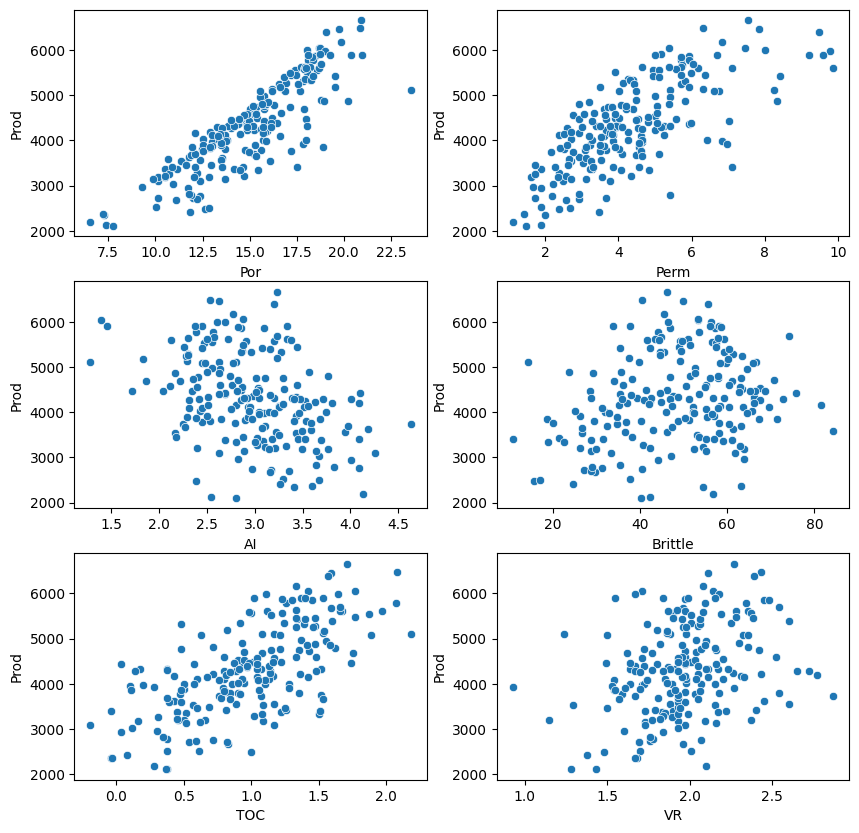

In [3]:
print(data.info())
print(data.describe())
fig, ax = plt.subplots(ncols= 2, nrows = 3, figsize = (10, 10))
sns.scatterplot(data = data, x = 'Por', y = 'Prod', ax = ax[0][0])
sns.scatterplot(data = data, x = 'Perm', y = 'Prod', ax = ax[0][1])
sns.scatterplot(data = data, x = 'AI', y = 'Prod', ax = ax[1][0])
sns.scatterplot(data = data, x = 'Brittle', y = 'Prod', ax = ax[1][1])
sns.scatterplot(data = data, x = 'TOC', y = 'Prod', ax = ax[2][0])
sns.scatterplot(data = data, x = 'VR', y = 'Prod', ax = ax[2][1])

1.   Все данные представленны в числовом виде, датафрейм не имеет не заполненных значений
2.   В настоящий момент видно, что колонка Well - это просто индекс от 1 до 200, который не несет смысловой нагрузки и от него можно будет избавиться
3.  На основании диаграмм рассеяния можно сделать выдо о наличии линейной
критериями Por, Perm, TOC и целевым значением PROD

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корреляционной матрицы: 8


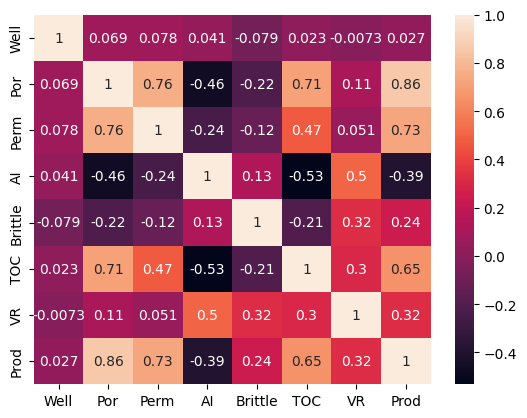

In [4]:
cor_matrix = data.corr()
sns.heatmap(cor_matrix, annot = True)
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(cor_matrix))

1) Колонка WELL не имеет какой -либо значимой корреляции с другими значениями, что и следовало ожидать. В принципе она не несет какой-либо смысл и мы от нее избавимся.

2) POR (пористость) имеет высокую корреляцию с нашим целевым показателем - PROD, а также значительную корреляцию с TOC (общий органический углерод (%)) и Perm (проницаемость скважины).

3) Perm (проницаемость скважины )имеет значительную корреляцию с нашим целевым показателем - PROD, а также значительную корреляцию с признаком POR (пористость)

4) AI (акустический импеданс), не имеет средней или сильной корреляции с другими признаками и слабо коррелирует с целевым показателем

5) Brittle (коэффициент хрупкости скважины (%)) аналогично с AI

6) VR (коэффициент отражения витринита) аналогично с AI

7) TOC (общий органический углерод (%)) - имеет среднюю корреляцию с целевым показателем, а также значительную корреляцию с POR (пористость)

Вывод:
В дальнейшем при построении модели можно будет убрать колонки WELL (т.к. не несет смысловой нагрузки) и колонку POR, т.к имеет существенную корреляцию с 2 другими признаками (Perm и TOC), при этом Perm и TOC имеют слабую корреляцию друг с другом.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
x = np.column_stack((np.ones(data.shape[0]), data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
y = data['Prod'].values
model = np.linalg.inv(x.T@x)@x.T@y

print(np.round(model, 0))

[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


1. Коэффициент 1 (Well) - неинформативен
2. Модель выявляет информативные признаки, такие как Por, Perm, AI, Brittle, TOC и VR


### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
x_new = np.array([1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
prediction = x_new@model
print(f'prediction: {prediction}' )

expected = 4748.315024

import sklearn.metrics as metrics

mae = metrics.mean_absolute_error([expected], [prediction])
print(f'Средняя абсолютная ошибка прогноза равна: {mae}')

y_pred = x@model
mae_all = metrics.mean_absolute_error(y, y_pred)
mape_all = metrics.mean_absolute_percentage_error(y, y_pred)
mse_all = metrics.mean_squared_error(y, y_pred)
print('Оценки по всем данным:')
print(f'Средняя абсолютная ошибка прогноза равна: {mae_all}')
print(f'Средняя абсолютная ошибка прогноза в процентах равна: {mape_all}')
print(f'Средняя квадратичная ошибка прогноза равна: {mse_all}')

prediction: 4723.064053707485
Средняя абсолютная ошибка прогноза равна: 25.250970292515376
Оценки по всем данным:
Средняя абсолютная ошибка прогноза равна: 153.62297086555168
Средняя абсолютная ошибка прогноза в процентах равна: 0.03627946845133313
Средняя квадратичная ошибка прогноза равна: 39315.040140266385


Модель показала неплохой результат в прогнозировании по конкретным данным. Ошибка прогноза ~25.25 ед, что составляет 0,534% от реального значения. Средняя абсолютная ошибка по данным из датафрейма составила ~153,623 или 3,63%

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [7]:
x = data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]
y = data['Prod']
x.corrwith(y)

,0
Well,0.026817
Por,0.861910
Perm,0.727426
AI,-0.390835
Brittle,0.237155
TOC,0.654445
VR,0.323182


Взаимосвязи между признаком Well и целевым покащательем отсутствует. Коээфициентом корреляции = 0.026817 можно принебречь. Что также соответствует коэффициенту для этого признака в полученной модели.

Признак AI имеет отрицательную корреляцию и отрицательный коэффициент в модели, а вот признак TOC имеет положительный коэффициент корреляции, но отрицательный коэффициент в модели. Данный эффект может быть вызван линейной зависимость признака TOC от признака Por (модель может "распределить" влияние между ними неинтуитивным образом.)

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [8]:
x_cleared = data[[ 'Por', 'AI', 'Brittle', 'TOC', 'VR']]
x_cleared = np.column_stack((np.ones(x_cleared.shape[0]), x_cleared))
new_model = np.linalg.inv(x_cleared.T@x_cleared)@x_cleared.T@y
print('Коэффициенты модели: \n', np.round(new_model, 0))

y_pred_cleared = x_cleared@new_model

mae_cleared = metrics.mean_absolute_error(y, y_pred_cleared)
mape_cleared = metrics.mean_absolute_percentage_error(y, y_pred_cleared)
mse_cleared = metrics.mean_squared_error(y, y_pred_cleared)
print(f'Средняя абсолютная ошибка прогноза равна: {mae_cleared}')
print(f'Средняя абсолютная ошибка прогноза в процентах равна: {mape_cleared}')
print(f'Средняя квадратичная ошибка прогноза равна: {mse_cleared}')

Коэффициенты модели: 
 [-1889.   290.  -140.    29.    89.   407.]
Средняя абсолютная ошибка прогноза равна: 170.36541690392698
Средняя абсолютная ошибка прогноза в процентах равна: 0.04019029494459264
Средняя квадратичная ошибка прогноза равна: 53393.679736215556


Можно отметить, что влияние Por увеличилось в новой модели. Также можно отметить, что TOC теперь имеет положительный коэффициент.
При этом сама модель стала давать результат хуже, чем предыдущая модель, что видно по метрикам.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [9]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(x_cleared, y)

print('Коэффициенты модели: \n', np.round(sk_model.coef_, 0))

y_pred_sk = sk_model.predict(x_cleared)

mae_sk = metrics.mean_absolute_error(y, y_pred_sk)
mape_sk = metrics.mean_absolute_percentage_error(y, y_pred_sk)
mse_sk = metrics.mean_squared_error(y, y_pred_sk)
print(f'Средняя абсолютная ошибка прогноза равна: {mae_sk}')
print(f'Средняя абсолютная ошибка прогноза в процентах равна: {mape_sk}')
print(f'Средняя квадратичная ошибка прогноза равна: {mse_sk}')

Коэффициенты модели: 
 [   0.  290. -140.   29.   89.  407.]
Средняя абсолютная ошибка прогноза равна: 170.36541690392477
Средняя абсолютная ошибка прогноза в процентах равна: 0.04019029494459078
Средняя квадратичная ошибка прогноза равна: 53393.67973621555


Библиотечная реализация линейной регрессии sklearn проставила такие же коээфициенты, как и модель построенная ранее 290, -140, 29, 89, 407. Соответсвенно метрики совпадают.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [25]:
x_standardized = StandardScaler().fit_transform(data[['Por', 'Perm', 'AI', 'Brittle', 'VR']])
x_poly_f = PolynomialFeatures(degree=3, include_bias = False).fit_transform(x_standardized)

print('Количество сгенерированных факторов =', x_poly_f.shape[1])

linear_model = LinearRegression(fit_intercept=True)

lm_results_mae = cross_validate(
    linear_model,
    x_poly_f,
    y,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True)

lm_results_mape = cross_validate(
    linear_model,
    x_poly_f,
    y,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    return_train_score=True)

lm_results_mse = cross_validate(
    linear_model,
    x_poly_f,
    y,
    scoring='neg_mean_squared_error',
    cv=5,
    return_train_score=True)

print("\nРезультаты:")
print('MAE на тренировочных фолдах: {:.2f}'.format(-lm_results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lm_results_mae['test_score'].mean()))
print('MAPE на тренировочных фолдах: {:.7f}'.format(-lm_results_mape['train_score'].mean()))
print('MAPE на валидационных фолдах: {:.7f}'.format(-lm_results_mape['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lm_results_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lm_results_mse['test_score'].mean()))

x_standardized_v2 = StandardScaler().fit_transform(data[['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']])
x_poly_f_v2 = PolynomialFeatures(degree=3, include_bias = False).fit_transform(x_standardized_v2)

print('\nКоличество сгенерированных факторов v2 =', x_poly_f_v2.shape[1])

linear_model_v2 = LinearRegression(fit_intercept=True)

lm_results_mae_v2 = cross_validate(
    linear_model_v2,
    x_poly_f_v2,
    y,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True)

lm_results_mape_v2 = cross_validate(
    linear_model_v2,
    x_poly_f_v2,
    y,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    return_train_score=True)

lm_results_mse_v2 = cross_validate(
    linear_model_v2,
    x_poly_f_v2,
    y,
    scoring='neg_mean_squared_error',
    cv=5,
    return_train_score=True)

print("\nРезультаты v2:")
print('MAE на тренировочных фолдах v2: {:.2f}'.format(-lm_results_mae_v2['train_score'].mean()))
print('MAE на валидационных фолдах v2: {:.2f}'.format(-lm_results_mae_v2['test_score'].mean()))
print('MAPE на тренировочных фолдах v2: {:.7f}'.format(-lm_results_mape_v2['train_score'].mean()))
print('MAPE на валидационных фолдах v2: {:.7f}'.format(-lm_results_mape_v2['test_score'].mean()))
print('MSE на тренировочных фолдах v2: {:.2f}'.format(-lm_results_mse_v2['train_score'].mean()))
print('MSE на валидационных фолдах v2: {:.2f}'.format(-lm_results_mse_v2['test_score'].mean()))



Количество сгенерированных факторов = 55

Результаты:
MAE на тренировочных фолдах: 33.96
MAE на валидационных фолдах: 69.73
MAPE на тренировочных фолдах: 0.0083588
MAPE на валидационных фолдах: 0.0173601
MSE на тренировочных фолдах: 1913.16
MSE на валидационных фолдах: 14552.57

Количество сгенерированных факторов v2 = 83

Результаты v2:
MAE на тренировочных фолдах v2: 22.74
MAE на валидационных фолдах v2: 76.19
MAPE на тренировочных фолдах v2: 0.0055459
MAPE на валидационных фолдах v2: 0.0189432
MSE на тренировочных фолдах v2: 809.92
MSE на валидационных фолдах v2: 13456.39


Было сгенерированно 2 дополнительных модели - одна с признаками из задания 5.6, а вторая со всеми признаками из df за исключением Well. Обе модели показали ущественный прирост в качестве по всем метрикам по отношению к модели из задания 5.6
Для первой модели после генерации полиномов третьей степени получено 55 признаков, для второй 83.
Вторая модель показывает наилучший результат на тренировочных данных по сравнению с первой, но хуже результат на валидационных тестах.
Кроме того, по обеим моделям существует большое отличие по всем метрикам между тестовым прогоном и валидационным, что говорит о переобучении моделей.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [26]:
alpha =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

iter_qty = 10000

lasso = Lasso(max_iter=iter_qty)

grid_search = GridSearchCV(
    lasso,
    param_grid = {'alpha': alpha},
    cv=5,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit='neg_mean_absolute_error',
)

grid_search.fit(x_poly_f, y)

print('Лучший параметр :', grid_search.best_params_['alpha'])

model = Lasso(alpha=grid_search.best_params_['alpha'], max_iter=iter_qty)
model.fit(x_poly_f, y)

cv = cross_validate(
    model,
    x_poly_f,
    y,
    cv=5,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    return_train_score=True
)

print('MAE на тренировочных фолдах: {:.2f}'.format(-cv['train_neg_mean_absolute_error'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv['test_neg_mean_absolute_error'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv['train_neg_mean_squared_error'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv['test_neg_mean_squared_error'].mean()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.460e+05, tolerance: 1.617e

Лучший параметр : 1
MAE на тренировочных фолдах: 38.05
MAE на валидационных фолдах: 59.95
MSE на тренировочных фолдах: 2406.32
MSE на валидационных фолдах: 11815.77


Отличие метрик между собой на тренировочных фолдах и валидационных фолдах уменьшилось, что говорит о том, что L1 регулярзация дала положительный эффект в борьбе с переобуением, между тем признаки переобучения все ещ присутствуют.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [29]:
ridge = Ridge()

grid_search = GridSearchCV(
    ridge,
    param_grid = {'alpha': alpha},
    cv=5,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit='neg_mean_absolute_error'
)

grid_search.fit(x_poly_f, y)

print('Лучший параметр :', grid_search.best_params_['alpha'])

model = Ridge(alpha=grid_search.best_params_['alpha'], max_iter=iter_qty)
model.fit(x_poly_f, y)

cv = cross_validate(
    model,
    x_poly_f,
    y,
    cv=5,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    return_train_score=True
)

print('MAE на тренировочных фолдах: {:.2f}'.format(-cv['train_neg_mean_absolute_error'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv['test_neg_mean_absolute_error'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv['train_neg_mean_squared_error'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv['test_neg_mean_squared_error'].mean()))

Лучший параметр : 0.0001
MAE на тренировочных фолдах: 33.96
MAE на валидационных фолдах: 69.73
MSE на тренировочных фолдах: 1913.16
MSE на валидационных фолдах: 14553.35


Если сравнивать модель 1 из задания 8.1 и текущую модель то мы видим, что результаты практически идентично. Это говорит о том, что L2 регуляризация не оказала влияние.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [28]:
elasticNet = ElasticNet()

l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]

grid_search = GridSearchCV(
    elasticNet,
    param_grid = {
        'alpha': alpha,
        'l1_ratio': l1_ratio
        },
    cv=5,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit='neg_mean_absolute_error'
)



grid_search.fit(x_poly_f, y)

print('Лучший параметр alpha:', grid_search.best_params_['alpha'])
print('Лучший параметр l1:', grid_search.best_params_['l1_ratio'])

model = ElasticNet(alpha=grid_search.best_params_['alpha'],
                  l1_ratio=grid_search.best_params_['l1_ratio'],
                  max_iter=iter_qty)
model.fit(x_poly_f, y)

cv = cross_validate(
    model,
    x_poly_f,
    y,
    cv=5,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    return_train_score=True
)

print('MAE на тренировочных фолдах: {:.2f}'.format(-cv['train_neg_mean_absolute_error'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv['test_neg_mean_absolute_error'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv['train_neg_mean_squared_error'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv['test_neg_mean_squared_error'].mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.431e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.627e+05, tolerance: 1.617e

Лучший параметр alpha: 0.01
Лучший параметр l1: 0.7
MAE на тренировочных фолдах: 35.84
MAE на валидационных фолдах: 69.27
MSE на тренировочных фолдах: 2089.75
MSE на валидационных фолдах: 14786.82


Модель показывает значения метрик сопоставимые с моделью 1 из задания 8.1, при этом незначительно снизилась разница между ними.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [32]:
pivot_data = {
    'Наименование модели': ['ЛР без регуляризации', 'ЛР без регуляризации v2', 'ЛР с LASSO', 'ЛР с Ridge', 'ЛР с ElasticNet'],
    'Гиперпараметры': [None, None, 'alpha = 1', 'alpha = 0.0001', ['alpha = 0.01', 'L1 = 0.7']],
    'Полиномиальные признаки': [True, True, True, True, True],
    'Метрики на тренировочных фолдах': [
        ['mae = 33.96, mse = 1913.16'],
        ['mae = 22.74, mse = 809.92'],
        ['mae = 38.05, mse = 2406.32'],
        ['mae = 33.96, mse = 1913.16'],
        ['mae = 35.84, mse = 2089.75']],
    'Метрики на валидационных фолдах': [
        ['mae = 69.73, mse = 14552.57'],
        ['mae = 76.19, mse = 13456.39'],
        ['mae = 59.95, mse = 11815.77'],
        ['mae = 69.73, mse = 14553.35'],
        ['mae = 69.27, mse = 14786.82']],
}

pivot_table = pd.DataFrame(pivot_data)
pivot_table


,Наименование модели,Гиперпараметры,Полиномиальные признаки,Метрики на тренировочных фолдах,Метрики на валидационных фолдах
0,ЛР без регуляризации,None,True,"[mae = 33.96, mse = 1913.16]","[mae = 69.73, mse = 14552.57]"
1,ЛР без регуляризации v2,None,True,"[mae = 22.74, mse = 809.92]","[mae = 76.19, mse = 13456.39]"
2,ЛР с LASSO,alpha = 1,True,"[mae = 38.05, mse = 2406.32]","[mae = 59.95, mse = 11815.77]"
3,ЛР с Ridge,alpha = 0.0001,True,"[mae = 33.96, mse = 1913.16]","[mae = 69.73, mse = 14553.35]"
4,ЛР с ElasticNet,"[alpha = 0.01, L1 = 0.7]",True,"[mae = 35.84, mse = 2089.75]","[mae = 69.27, mse = 14786.82]"


Лучшей моделью оказалась модель ЛР с LASSO, т.к. имеет лучшие метрики на валидационных фолдах и показывает наименьший разброс между значениями метрик на валидационных и тренировочных фолдах.